In [11]:
# Dependecy import
import pandas as pd
import matplotlib.pyplot as plt

# File to Load (Remember to change the path if needed.)
data_to_load = "Resources/us_hospital_locations.csv"

hospital_info_df = pd.read_csv(data_to_load)

hospital_info_df.head()

,X,Y,FID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
0,-1.331889e+07,4.346975e+06,1,5793230,CENTRAL VALLEY GENERAL HOSPITAL,1025 NORTH DOUTY STREET,HANFORD,CA,93230,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.hanfordhealth.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,49,NOT AVAILABLE,N
1,-1.322651e+07,4.049626e+06,2,53391362,LOS ROBLES HOSPITAL & MEDICAL CENTER - EAST CA...,150 VIA MERIDA,WESTLAKE VILAGE,CA,91362,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.losrobleshospital.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,62,NOT AVAILABLE,N
2,-1.315620e+07,4.031978e+06,3,11190023,EAST LOS ANGELES DOCTORS HOSPITAL,4060 WHITTIER BOULEVARD,LOS ANGELES,CA,90023,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.elalax.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,127,NOT AVAILABLE,N
3,-1.317190e+07,4.041752e+06,4,17090028,SOUTHERN CALIFORNIA HOSPITAL AT HOLLYWOOD,6245 DE LONGPRE AVENUE,HOLLYWOOD,CA,90028,NOT AVAILABLE,...,2014/02/10 00:00:00,http://sch-hollywood.com/,NOT AVAILABLE,HOLLYWOOD COMMUNITY HOSPITAL OF HOLLYWOOD,6,PROPRIETARY,-999,100,NOT AVAILABLE,N
4,-1.313208e+07,4.037270e+06,5,23691706,KINDRED HOSPITAL BALDWIN PARK,14148 FRANCISQUITO AVENUE,BALDWIN PARK,CA,91706,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.khbaldwinpark.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,95,NOT AVAILABLE,N


In [12]:
# Basic EDA to see what we have
print(hospital_info_df.shape)
hospital_info_df.columns

(7596, 34)


Index(['X', 'Y', 'FID', 'ID', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP',
       'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION', 'COUNTY',
       'COUNTYFIPS', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE',
       'NAICS_DESC', 'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE',
       'WEBSITE', 'STATE_ID', 'ALT_NAME', 'ST_FIPS', 'OWNER', 'TTL_STAFF',
       'BEDS', 'TRAUMA', 'HELIPAD'],
      dtype='object')

In [13]:
# Determine the number of unique values in each column.
unique_values = hospital_info_df.nunique()
unique_values

X             7594
Y             7595
FID           7596
ID            7596
NAME          7342
ADDRESS       7470
CITY          3373
STATE           57
ZIP           5640
ZIP4           111
TELEPHONE     6338
TYPE            10
STATUS           2
POPULATION     718
COUNTY        1605
COUNTYFIPS    2577
COUNTRY          7
LATITUDE      7595
LONGITUDE     7594
NAICS_CODE       3
NAICS_DESC      17
SOURCE         101
SOURCEDATE     100
VAL_METHOD       2
VAL_DATE       287
WEBSITE       6658
STATE_ID      3516
ALT_NAME       867
ST_FIPS         57
OWNER            8
TTL_STAFF        1
BEDS           728
TRAUMA          34
HELIPAD          2
dtype: int64

In [14]:
# Dropping all non-USA rows from the country column
hospital_info_df = hospital_info_df[hospital_info_df["COUNTRY"] == 'USA']
print(hospital_info_df.shape)
hospital_info_df

(7513, 34)


,X,Y,FID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
0,-1.331889e+07,4.346975e+06,1,5793230,CENTRAL VALLEY GENERAL HOSPITAL,1025 NORTH DOUTY STREET,HANFORD,CA,93230,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.hanfordhealth.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,49,NOT AVAILABLE,N
1,-1.322651e+07,4.049626e+06,2,53391362,LOS ROBLES HOSPITAL & MEDICAL CENTER - EAST CA...,150 VIA MERIDA,WESTLAKE VILAGE,CA,91362,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.losrobleshospital.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,62,NOT AVAILABLE,N
2,-1.315620e+07,4.031978e+06,3,11190023,EAST LOS ANGELES DOCTORS HOSPITAL,4060 WHITTIER BOULEVARD,LOS ANGELES,CA,90023,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.elalax.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,127,NOT AVAILABLE,N
3,-1.317190e+07,4.041752e+06,4,17090028,SOUTHERN CALIFORNIA HOSPITAL AT HOLLYWOOD,6245 DE LONGPRE AVENUE,HOLLYWOOD,CA,90028,NOT AVAILABLE,...,2014/02/10 00:00:00,http://sch-hollywood.com/,NOT AVAILABLE,HOLLYWOOD COMMUNITY HOSPITAL OF HOLLYWOOD,6,PROPRIETARY,-999,100,NOT AVAILABLE,N
4,-1.313208e+07,4.037270e+06,5,23691706,KINDRED HOSPITAL BALDWIN PARK,14148 FRANCISQUITO AVENUE,BALDWIN PARK,CA,91706,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.khbaldwinpark.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,95,NOT AVAILABLE,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7591,-8.566905e+06,4.728815e+06,7607,183520904,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER,11890 HEALING WAY,SILVER SPRING,MD,20904,NOT AVAILABLE,...,2020/05/05 00:00:00,https://www.adventisthealthcare.com/locations/...,NOT AVAILABLE,NOT AVAILABLE,24,NON-PROFIT,-999,178,NOT AVAILABLE,N
7592,-1.219624e+07,3.676931e+06,7608,192185607,COPPER QUEEN DOUGLAS EMERGENCY DEPARTMENT,100 E. 5TH STREET,DOUGLAS,AZ,85607,NOT AVAILABLE,...,2020/05/05 00:00:00,https://cqch.org/cqch-clinics/copper-queen-dou...,NOT AVAILABLE,NOT AVAILABLE,4,NON-PROFIT,-999,-999,LEVEL IV,N
7593,-8.084677e+06,5.094112e+06,7609,196706457,WHITING FORENSIC HOSPITAL,70 OBRIEN DR,MIDDLETOWN,CT,6457,3945,...,2020/05/08 00:00:00,https://portal.ct.gov/dmhas/wfh/whiting-forens...,NOT AVAILABLE,NOT AVAILABLE,9,GOVERNMENT - STATE,-999,229,NOT AVAILABLE,N
7594,-8.522423e+06,4.718512e+06,7610,191021401,J KENT MCNEW FAMILY MEDICAL CENTER,175 HARRY S TRUMAN PARKWAY,ANNAPOLIS,MD,21401,NOT AVAILABLE,...,2020/05/05 00:00:00,https://aahs.org/locations/j--kent-mcnew-famil...,NOT AVAILABLE,NOT AVAILABLE,24,NON-PROFIT,-999,-999,NOT AVAILABLE,N


In [15]:

# Removing unneccesary columns
hospital_info_df = hospital_info_df.drop(['TTL_STAFF', 'SOURCE', 'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'STATE_ID', 'ALT_NAME'], axis=1)
hospital_info_df.shape

(7513, 27)

In [16]:
hospital_info_df.describe()

,X,Y,FID,ID,ZIP,POPULATION,LATITUDE,LONGITUDE,NAICS_CODE,ST_FIPS,BEDS
count,7.513000e+03,7.513000e+03,7513.000000,7.513000e+03,7513.000000,7513.000000,7513.000000,7513.000000,7513.000000,7513.00000,7513.000000
mean,-1.033206e+07,4.542538e+06,3801.328364,2.880154e+07,54194.659657,28.116598,37.534197,-92.814508,622142.304006,29.00559,101.965260
std,1.659958e+06,7.771289e+05,2196.352135,4.530573e+07,27137.957590,387.763763,5.410526,14.911658,67.305727,15.78928,280.441619
min,-1.966350e+07,2.178457e+06,1.000000,4.000000e+00,1040.000000,-999.000000,19.199663,-176.640263,622110.000000,1.00000,-999.000000
25%,-1.095546e+07,3.967525e+06,1903.000000,4.144113e+06,32501.000000,25.000000,33.542427,-98.414607,622110.000000,17.00000,25.000000
50%,-1.003868e+07,4.585822e+06,3800.000000,1.003892e+07,55435.000000,64.000000,38.045266,-90.179037,622110.000000,29.00000,72.000000
75%,-9.129520e+06,5.063949e+06,5703.000000,2.577709e+07,77030.000000,175.000000,41.348952,-82.011873,622110.000000,42.00000,188.000000
max,-7.488241e+06,1.150485e+07,7611.000000,1.967841e+08,99929.000000,1592.000000,71.297725,-67.268016,622310.000000,56.00000,1592.000000


In [17]:
hospital_info_df["STATE"].value_counts()

TX    805
CA    565
FL    352
OH    294
PA    278
NY    275
LA    256
IL    225
GA    222
IN    191
MI    183
MO    180
TN    171
KS    171
WI    169
OK    168
NC    157
AZ    153
NJ    149
VA    144
MN    143
IA    141
MA    137
AL    133
WA    132
MS    131
KY    131
CO    124
AR    122
SC    112
NE    112
NV     80
SD     76
OR     72
MD     71
WV     71
UT     71
MT     70
NM     63
ND     58
ID     54
ME     52
CT     42
NH     38
WY     37
AK     32
HI     31
RI     20
VT     18
DE     16
DC     15
Name: STATE, dtype: int64

In [18]:
hospital_info_df["TYPE"].value_counts()

GENERAL ACUTE CARE    4411
CRITICAL ACCESS       1027
PSYCHIATRIC            755
LONG TERM CARE         431
REHABILITATION         377
MILITARY               215
SPECIAL                141
CHILDREN               127
WOMEN                   20
CHRONIC DISEASE          9
Name: TYPE, dtype: int64

In [20]:
#Setting the x and y for a bar graph

x_axis = ["GENERAL ACUTE CARE", "CRITICAL ACCESS", "PSYCHIATRIC", "LONG TERM CARE", "REHABILITATION", "MILITARY", "SPECIAL", "CHILDREN", "WOMEN", "CHRONIC DISEASE"]

y_axis = [4411,1027,755,431,377,215,141,127,20,9]



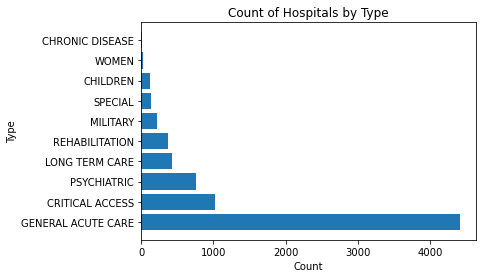

In [23]:
plt.barh(x_axis, y_axis, label='Type of Hospital')
plt.xlabel("Count")
plt.ylabel("Type")

#create a title
plt.title("Count of Hospitals by Type")
plt.show()

In [9]:
hospital_df = hospital_info_df[hospital_info_df['TYPE'] == 'GENERAL ACUTE CARE']
hospital_df.head()

,X,Y,FID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCEDATE,ST_FIPS,OWNER,BEDS,TRAUMA,HELIPAD
0,-1.331889e+07,4.346975e+06,1,5793230,CENTRAL VALLEY GENERAL HOSPITAL,1025 NORTH DOUTY STREET,HANFORD,CA,93230,NOT AVAILABLE,...,36.336159,-119.645667,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,2016/02/04 00:00:00,6,PROPRIETARY,49,NOT AVAILABLE,N
1,-1.322651e+07,4.049626e+06,2,53391362,LOS ROBLES HOSPITAL & MEDICAL CENTER - EAST CA...,150 VIA MERIDA,WESTLAKE VILAGE,CA,91362,NOT AVAILABLE,...,34.154939,-118.815736,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,2019/08/02 00:00:00,6,PROPRIETARY,62,NOT AVAILABLE,N
2,-1.315620e+07,4.031978e+06,3,11190023,EAST LOS ANGELES DOCTORS HOSPITAL,4060 WHITTIER BOULEVARD,LOS ANGELES,CA,90023,NOT AVAILABLE,...,34.023647,-118.184165,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,2019/08/02 00:00:00,6,PROPRIETARY,127,NOT AVAILABLE,N
3,-1.317190e+07,4.041752e+06,4,17090028,SOUTHERN CALIFORNIA HOSPITAL AT HOLLYWOOD,6245 DE LONGPRE AVENUE,HOLLYWOOD,CA,90028,NOT AVAILABLE,...,34.096391,-118.325235,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,2019/08/02 00:00:00,6,PROPRIETARY,100,NOT AVAILABLE,N
4,-1.313208e+07,4.037270e+06,5,23691706,KINDRED HOSPITAL BALDWIN PARK,14148 FRANCISQUITO AVENUE,BALDWIN PARK,CA,91706,NOT AVAILABLE,...,34.063039,-117.967438,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,2019/08/02 00:00:00,6,PROPRIETARY,95,NOT AVAILABLE,N


In [10]:
hospital_df["STATE"].value_counts()

CA    446
TX    412
FL    233
PA    188
NY    186
LA    155
OH    150
IL    137
GA    132
WI    129
NC    128
TN    125
MI    124
MO     97
VA     96
IN     94
AL     93
KS     91
OK     86
NJ     82
MA     80
MS     80
AZ     80
SC     78
KY     78
MN     65
AR     64
WA     62
CO     61
MD     51
IA     51
OR     49
NV     43
ID     40
NM     38
UT     38
WV     31
CT     29
NH     28
ME     27
NE     26
HI     20
SD     18
MT     15
AK     14
RI     13
WY     13
ND     12
DE      9
DC      8
VT      6
Name: STATE, dtype: int64

In [ ]:
Create the tables that we have in the database